In [1]:
#library for reading csv files
library(data.table)
library(ggplot2)
library(knitr)
library(MASS)
library(ISLR)
library (magrittr)

#new package stargazer, but install first
install.packages("stargazer")
library(stargazer)

#read the Boston data set
data(Boston)

#convert to data.table
Boston <- data.table(Boston)

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
#read the Boston data set
data(Boston)

In [3]:
#convert to data.table
Boston <- data.table(Boston)

In [4]:
str(Boston)

Classes 'data.table' and 'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, ".internal.selfref")=<externalptr> 


rm: how many rooms
medv: median value of owner-occupied homes in $1000's

I want to study the relationship between the number of rooms and the price of a house in Boston. I will build a linear regression odel. #possibe exam question: will ask data and which relationship to study.

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon
$$

where $y$ is the price of the house and $x_1$ is the number of rooms. 


`geom_smooth()` using formula = 'y ~ x'


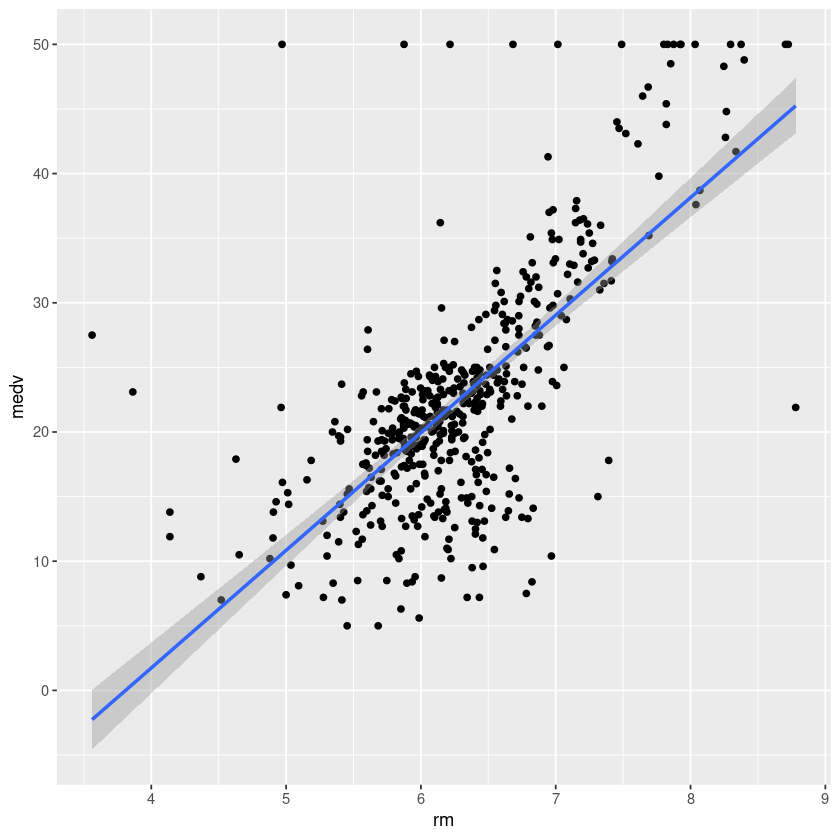

In [5]:
#explore the relationship between price of the house and the number of rooms
# plot the relationship between price and number of rooms
ggplot(Boston, aes(x=rm, y=medv)) + geom_point() + geom_smooth(method=lm)

MY NOTE: exam question: which hypothesis?
--> The more rooms you have, the highter the price?

He will label the axis so we know what is what. He will adapt the variables (e.g. patents and country...)

Important for the future: start with the Graph and then formulate hypothesis.

I will construct the hypotheis statement as follows:

The null hypothesis is that the higher the number of rooms, the higher the price of the rooms.

In [6]:
#test it with the linear model
lm.fit <- lm(medv ~ rm, data=Boston)

#summary of the linear model
summary(lm.fit)


Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


we now need a new package: stargazer --> see at the top
we now have to run everything again to continue --> with the "Alle ausführen" button

In [7]:
# print the model with stargazer, stargazer gives me the output of the exam
stargazer(lm.fit, type="text")


                        Dependent variable:    
                    ---------------------------
                               medv            
-----------------------------------------------
rm                           9.102***          
                              (0.419)          
                                               
Constant                    -34.671***         
                              (2.650)          
                                               
-----------------------------------------------
Observations                    506            
R2                             0.484           
Adjusted R2                    0.483           
Residual Std. Error      6.616 (df = 504)      
F Statistic          471.847*** (df = 1; 504)  
Note:               *p<0.1; **p<0.05; ***p<0.01


MY NOTE: In the exam you will be asked: The coefficient is XY, do you accept hypothesis?

Sterne markieren Signifikanznivenau

one star: signifikant (<5%) --> we accept the hypothesis

two stars: very signigicant (<1%) --> we accept the hypothesis

three stars: high signifikant (<0.1%) --> we accept the hypothesis


--> If you increase one unit rm (number of rooms in the house), the unit (price of houses) will increase by 9.2K

wichtig: will not ask about R2 (R Quadrad)

The above model shows the coefficient is 9.1021, which means that the price of the house increases by 9102 dollars for each additional room. Because the significance level is less than 0.05, we can accept the alternative hypothesis. (positive relationship)

However, this model does not take into account the effect of the other variables, such as
- crime rate in the neighborhood
- the age of the house
- the distance to the city center
- the number of schools in the neighborhood


Normally, we set the null hypothesis as the opposite of what we want to prove (e.g. the null hypothesis is that the number of rooms does not affect the price of the house), so we would have to reject the null hypothesis to prove our hypothesis. However, in this case, we want to prove that the number of rooms affects the price of the house, so we will accept the null hypothesis.

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)

corrplot 0.92 loaded



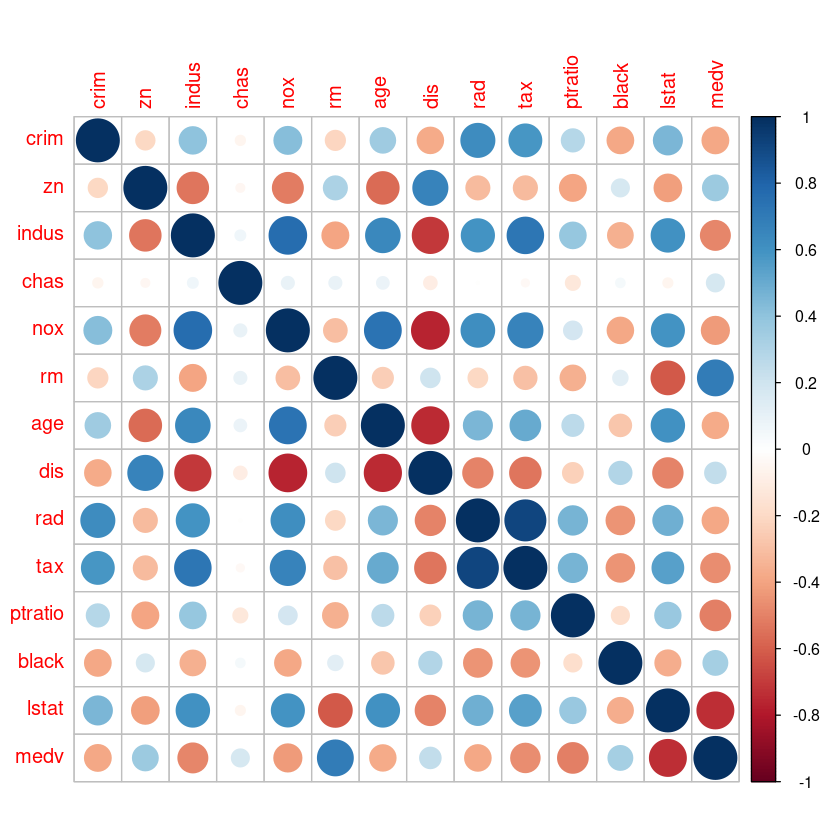

In [8]:
# there are many factors that can affect the price of the house
# lets plot the the correlation matric

install.packages("corrplot")
library(corrplot)

corrplot(cor(Boston), method="circle")

MY NOTE: he likes this graph a lot, will possibly come in the exam --> he will ask, which variables we should plot against each other

blue: possitive correlation

red: negative correlation

can go collumn or row wise


lstat: % lower status of the population in that area --> positive with crime rate, age of the house, distance to the city center, number of schools in the neighborhood

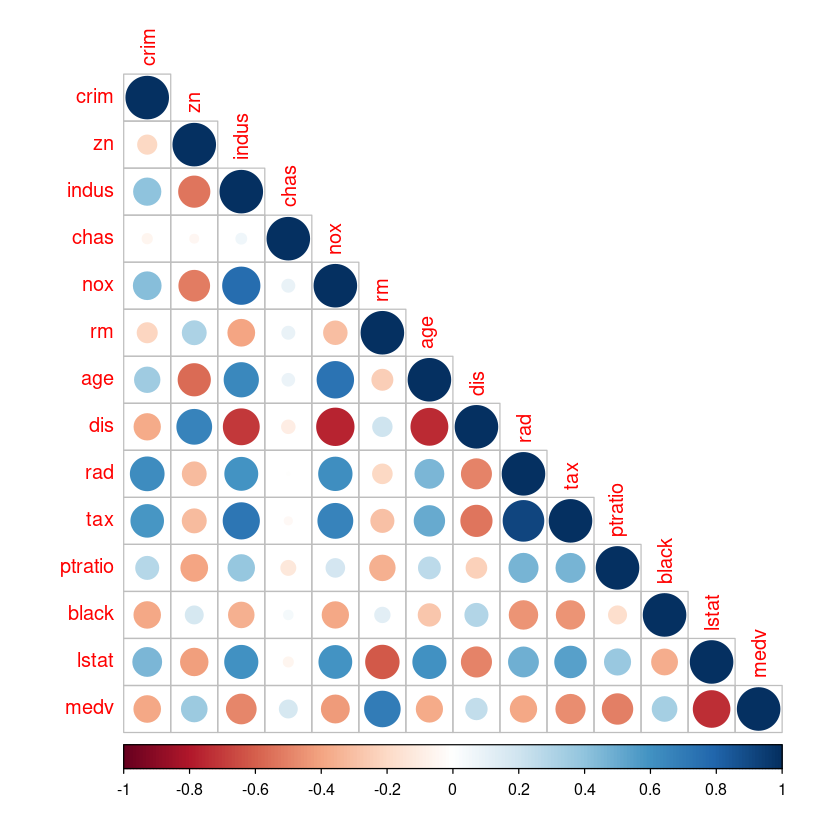

In [9]:
# corrplot with half matrix with circles
corrplot(cor(Boston), method="circle", type="lower")

"Based on this Graph, what kind of variables would you put into the model?"

First: look at size of the dots --> if they are very small, they are not significant

--> choose the ones with the biggest dots and strong color (e.g. medv: choose rm and lstat)

MY NOTE: We will still choose negative relationship (e.g. drug use + number of houses is negativ but still useful insight) -->formulation of null hypothesis matters

I have explained to you the way of doing data analysis:

A: medv
B: lstat
C: age
D: crime
E: rooms

- univariate analysis (one variable) --> normal/ poisson/ binominal distribution (continuous or discrete) --> A (B/C/D/E) (components)

- bivariate analysis (two variables) --> relation ---> A-B, A-C, B-C, B-D, C-D, A-E, ... (combine)
 
  --> correlation analysis (e.g. star wants to sell his house:"it is close to school, (price-education))

  --> hypothesis testing

    for instance: the higher the number of rooms, the higher the price of the house
   
    for instance: the higher the crime rate, the lower the price of the house
    
- multivariate analysis (more than two variables) --> which one matters most? A<-B,D,E>

--> look again an presentation in GoodNotes T2 

In [10]:
# now we will add more vriables to the model
# we will add lstat
# lstat is the percentage of lower status of the population

model2 <- lm(medv ~ rm + lstat, data=Boston)
stargazer(model2, type="text")


                        Dependent variable:    
                    ---------------------------
                               medv            
-----------------------------------------------
rm                           5.095***          
                              (0.444)          
                                               
lstat                        -0.642***         
                              (0.044)          
                                               
Constant                      -1.358           
                              (3.173)          
                                               
-----------------------------------------------
Observations                    506            
R2                             0.639           
Adjusted R2                    0.637           
Residual Std. Error      5.540 (df = 503)      
F Statistic          444.331*** (df = 2; 503)  
Note:               *p<0.1; **p<0.05; ***p<0.01


MY NOTE: 2nd question in the exam (80-90%): rm and lstat --> why did the result of rm change? 

--> because we added another variable (lstat) --> we have to interpret the coefficient of rm differently now

--> the more variables, the affect of the final result has to be devided into different factors 

--> number becomes smaller, because it doesnt matter that much any more, because we have more variables

His answer: We notice that the coefficient of rm has changed from 9.1021 to 5.0948. This is because we have added another variable (lstat) to the model. The coefficient of rm is now the effect of rm on the price of the house, holding lstat constant. In other words, the price of the house increases by 5.0948 dollars for each additional room, holding lstat constant.

lstat negative: the higher the share of poor people, the lower the price of the house

Multicolliniearity is two or more independent variables are highly correlated with one another in a regression model. This is a problem because it can cause the coefficients to flip signs. In other words, the effect of one variable on the dependent variable can be positive, but when we add another variable to the model, the effect of the first variable on the dependent variable can become negative. This is what happened to the coefficient of rm. When we added lstat to the model, the coefficient of rm changed from 9.1021 to 5.0948. This is because lstat is highly correlated with rm. In other words, the effect of rm on the price of the house is positive, but when we add lstat to the model, the effect of rm on the price of the house becomes negative. This is because lstat is negatively correlated with the price of the house. In other words, the higher the percentage of lower status of the population in that area, the lower the price of the house.

HIS: multicolliniearity is a problem, because it can cause the coefficients to flip signs. In other words, the effect of one variable on the dependent variable can be positive, but when we add another variable to the model, the effect of the first variable on the dependent variable can become negative. This is what happened to the coefficient of rm. When we added lstat to the model, the coefficient of rm changed from 9.1021 to 5.0948. This is because lstat is highly correlated with rm. In other words, the effect of rm on the price of the house is positive, but when we add lstat to the model, the effect of rm on the price of the house becomes negative. This is because lstat is negatively correlated with the price of the house. In other words, the higher the percentage of lower status of the population in that area, the lower the price of the house.

In [11]:
# we have added lstat to the model 
# now we want to add more variabvles, such as age
# dependent variable is medv
# independent variables are rm, lstat, and age

model3 <- lm(medv ~ rm + lstat + age, data=Boston)
stargazer(model2, type="text")


                        Dependent variable:    
                    ---------------------------
                               medv            
-----------------------------------------------
rm                           5.095***          
                              (0.444)          
                                               
lstat                        -0.642***         
                              (0.044)          
                                               
Constant                      -1.358           
                              (3.173)          
                                               
-----------------------------------------------
Observations                    506            
R2                             0.639           
Adjusted R2                    0.637           
Residual Std. Error      5.540 (df = 503)      
F Statistic          444.331*** (df = 2; 503)  
Note:               *p<0.1; **p<0.05; ***p<0.01


MY NOTE: highy correlated (age, lstat) variables tell you the same thing --> you dont need both of them for the model, model will not be accurate (look at dots from before)

In [12]:
# we will now only put either age or lstat
# dependent variable is medv
# independent variables are rm, age

model4 <- lm(medv ~ rm + age, data=Boston)
stargazer(model4, type="text")



                        Dependent variable:    
                    ---------------------------
                               medv            
-----------------------------------------------
rm                           8.402***          
                              (0.412)          
                                               
age                          -0.073***         
                              (0.010)          
                                               
Constant                    -25.277***         
                              (2.857)          
                                               
-----------------------------------------------
Observations                    506            
R2                             0.530           
Adjusted R2                    0.528           
Residual Std. Error      6.316 (df = 503)      
F Statistic          283.920*** (df = 2; 503)  
Note:               *p<0.1; **p<0.05; ***p<0.01


MY NOTE: age and lstat are very similar (same dimension, very highly correlated), but not identical, thats why lstat is -0.642 and age is 0.073 because they react differntly to the price of the house

No need to put age and lstat into the model, because they are highly correlated

With lecture: which dimension matter for innovation: entrepreneurs, institutions, university networks, organization of the firms (mirror hypothesis)



In [13]:
# now will use the following variables
# rm
# lstat
# crim 

# no age, because highly correlated with lstat

model5 <- lm(medv ~ rm + lstat + crim, data=Boston)
stargazer(model5, type="text")


                        Dependent variable:    
                    ---------------------------
                               medv            
-----------------------------------------------
rm                           5.217***          
                              (0.442)          
                                               
lstat                        -0.578***         
                              (0.048)          
                                               
crim                         -0.103***         
                              (0.032)          
                                               
Constant                      -2.562           
                              (3.166)          
                                               
-----------------------------------------------
Observations                    506            
R2                             0.646           
Adjusted R2                    0.644           
Residual Std. Error      5.490 (df = 50

MY NOTES:
all three factors are significant

room positive --> more rooms, higher price

lstat negative --> more poor people, lower price

age negative --> older houses, lower price



lstat and crim not very identical, because poorness doesn't always mean crime


one extra room --> 5.1K more

one unit more of lstat --> 0.6K less

one unit of crime --> 0.1K less

"coefficient of crime small because not crime everyday" 

In exam: either circle graph OR give context (equation: overview data analysis at top) + table and he asks which we should choose 